In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

In [82]:
### Load Dataset
df = pd.read_csv(r"E:\PROFESSION\NG\Research\PN_Raja\Muenster_hai.csv")
df.head()

,AGG_DAY_PERIOD,GEOGRAPHY,ACTIVITY_INDEX_TOTAL,XLON,XLAT
0,2020-12-31,120203021133103213,0.081590,7.003098,51.442453
1,2020-12-31,120203021130221130,0.016807,6.875381,51.465558
2,2020-12-31,120203021130303123,0.127186,6.917953,51.471547
3,2020-12-31,120203012210111031,0.024016,7.288742,51.833656
4,2020-12-31,120203012112121023,0.033855,7.615585,51.981920


In [83]:
# Convert 'date' column to datetime
df['ds'] = pd.to_datetime(df['AGG_DAY_PERIOD'])
df['y'] = df['ACTIVITY_INDEX_TOTAL']

# Group by date and compute centroid of latitude and longitude
result = df.groupby('ds').agg(
    Lat=('XLAT', 'mean'),
    Lon=('XLON', 'mean'),
    y=('y', 'sum')
).reset_index()

result['unique_id'] = 1
result['ds'] = pd.to_datetime(result.ds)
# Save the result to a new CSV file
result.to_csv('Daily_HAI.csv', index=False)

print("Grouping completed and saved to grouped_data.csv")

Grouping completed and saved to grouped_data.csv


In [3]:
### Load Daily_HAI Dataset
df = pd.read_csv(r"C:\Users\janak\Muenster_HAI_PatchTST\Daily_HAI.csv")


In [5]:
df['ds'] = pd.to_datetime(df.ds, format='%Y-%m-%d')

In [11]:
### Define Validation and Test Size
n_time = 366
val_size = 48
test_size = 96

print(n_time, val_size, test_size)

366 48 96


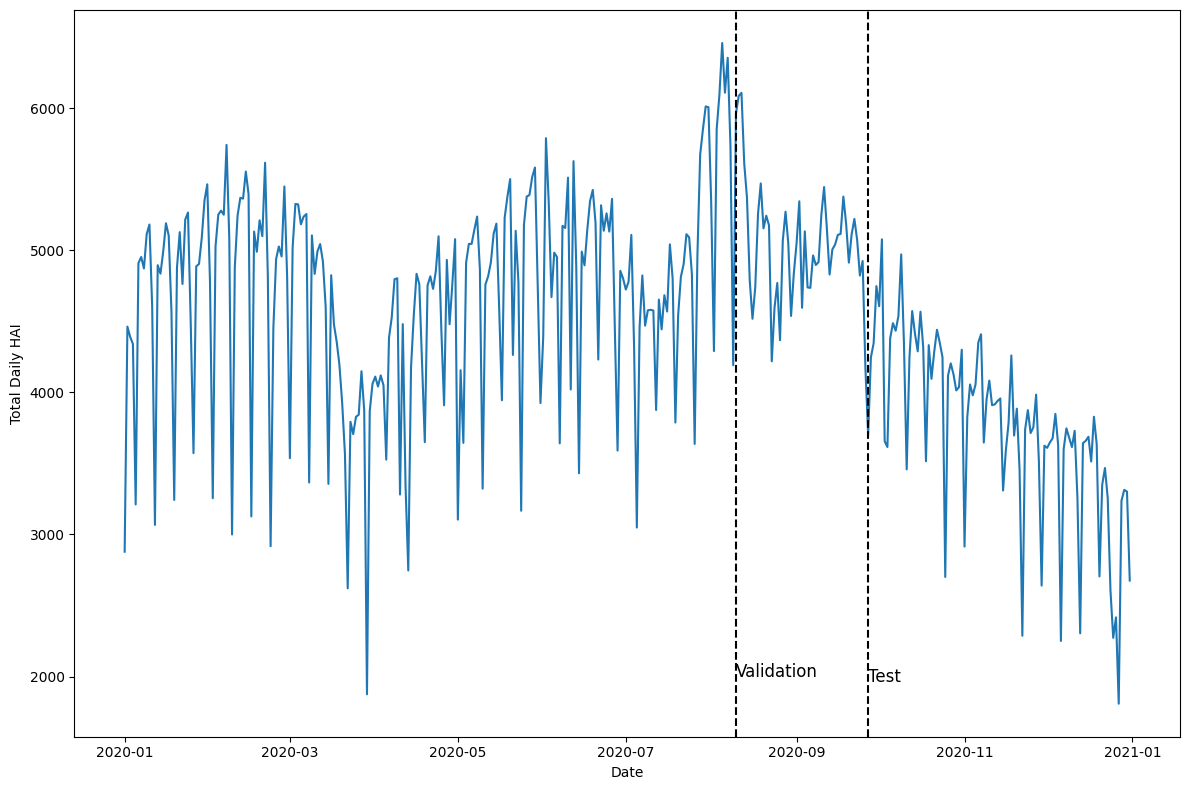

In [12]:
x_plot = df.ds
y_plot = df.y.values

x_plot

x_val = x_plot[n_time - val_size - test_size]
x_test = x_plot[n_time - test_size]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_plot, y_plot)
ax.set_xlabel('Date')
ax.set_ylabel('Total Daily HAI')
ax.axvline(x_val, color='black', linestyle='--')
ax.axvline(x_test, color='black', linestyle='--')

plt.text(x_val, 2000, 'Validation', fontsize=12)
plt.text(x_test,2000, 'Test', verticalalignment='center', fontsize=12)

plt.tight_layout()

In [13]:
### Define Models
horizon = 96

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
Seed set to 1
Seed set to 1


In [14]:
### Model Initiation
nf = NeuralForecast(models=models, freq='D')


In [15]:
### Model Running
preds_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)


C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\common\_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: C:\Users\janak\Muenster_HAI_PatchTST\lightning_logs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.9 M 
-----------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.775    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


RuntimeError: maximum size for tensor at dimension 2 is 240 but size is 288

In [99]:
df['ds'] = pd.to_datetime(df.ds, format='%Y-%M-%D')
type(df.ds)

pandas.core.series.Series

In [100]:
df.ds

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
361   2020-12-27
362   2020-12-28
363   2020-12-29
364   2020-12-30
365   2020-12-31
Name: ds, Length: 366, dtype: datetime64[ns]